<a href="https://colab.research.google.com/github/ChiliJoe/genai-intro/blob/main/genai_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Suno - Text to Speech

In [ ]:
%%capture
!pip install git+https://github.com/suno-ai/bark.git

**IMPORTANT: Set GPU runtime for faster result** _Runtime_ > _Change runtime type_ (_relevant only for Suno_)

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
from bark import SAMPLE_RATE, generate_audio, preload_models
from IPython.display import Audio

preload_models()

In [ ]:
text_prompt = """
Hello, my name is Suno. And, uh — and I like pizza. [laughs]
But I also [clears throat] have other interests such as [sighs] playing tic tac toe.
"""
audio_array = generate_audio(text_prompt)
Audio(audio_array, rate=SAMPLE_RATE)

100%|██████████| 34/34 [00:34<00:00,  1.02s/it]


Below is a list of some known non-speech sounds supported by Suno.

* [laughter]
* [laughs]
* [sighs]
* [music]
* [gasps]
* [clears throat]
* — or ... for hesitations
* ♪ for song lyrics
* CAPITALIZATION for emphasis of a word
* [MAN] and [WOMAN] to bias Bark toward male and female speakers, respectively

# OpenAI - set API key

The rest of this notebook uses APIs hosted by OpenAI. An API key is required to run these examples.

**How to Get an OpenAI API Key**

1. Go to OpenAI's Platform website at platform.openai.com and sign in with an OpenAI account.
2. Click your profile icon at the top-right corner of the page and select "View API Keys."
3. Click "Create New Secret Key" to generate a new API key.

In [ ]:
%%capture
%env OPENAI_API_KEY=

In [ ]:
%%capture
!pip install openai

# Using Dall-E

In [ ]:
import openai, os
from IPython.display import display, Image
import tempfile, base64

openai.api_key  = os.getenv('OPENAI_API_KEY')

def gen_image(prompt, num_images=1):
  image_resp = openai.Image.create(prompt=prompt, n=num_images, size="256x256", response_format="b64_json",)
  for rslt in image_resp["data"]:
    img_file = tempfile.NamedTemporaryFile(suffix='.png')
    with open(img_file.name, 'wb') as f:
      f.write(base64.b64decode(
            rslt["b64_json"]
          )
      )

    display(Image(img_file.name))


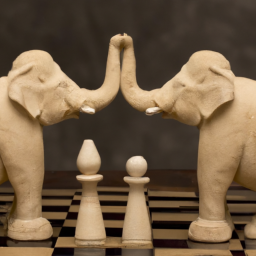

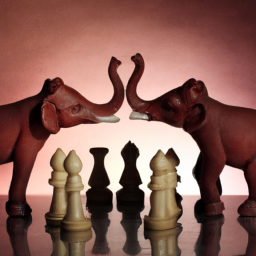

In [ ]:
animal="elephants"
prompt=f"two {animal} playing chess"
gen_image(prompt,2)

# Using __openai.ChatCompletion__ API

## Prompt Techniques

Define helper function for demo:

In [ ]:
import openai, os
from IPython.display import display, Markdown

openai.api_key  = os.getenv('OPENAI_API_KEY')

def get_completion(prompt, model="gpt-3.5-turbo", silent=False):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    if silent:
      return response.choices[0].message["content"]
    else:
      display(Markdown(response.choices[0].message["content"]))

### Summarizing an article

In [ ]:
prompt="""
It is very rare for snow to fall in the U.S. state of Florida, especially in the central and southern portions of the state.
With the exception of the far northern areas of the state, most of the major cities in Florida have never recorded measurable snowfall,
though trace amounts have been recorded, or flurries in the air observed few times each century. According to the National Weather Service,
in the Florida Keys and Key West there is no known occurrence of snow flurries since the European colonization of the region more than
300 years ago. In Miami, Fort Lauderdale, and Palm Beach there has been only one known report of snow flurries observed in the air in more
than 200 years; this occurred in January 1977. In any event, Miami, Fort Lauderdale, and Palm Beach have not seen snow flurries before
or since this 1977 event.

Summarize this paragraph in a single sentence:
"""
get_completion(prompt=prompt)

Snow is a rare occurrence in Florida, with most major cities never recording measurable snowfall and the Florida Keys and Key West having no known occurrence of snow flurries since European colonization, while Miami, Fort Lauderdale, and Palm Beach have only experienced snow flurries once in over 200 years.

### Giving Instructions

In [ ]:
prompt="""
Read the following sales email. Remove any identifiable information,
and replace it with the appropriate placeholder. For example, replace the name "John Doe"
with "[NAME]".

Hi John,

I'm writing to you because I noticed you recently purchased a new car. I'm a salesperson
at a local dealership (Cheap Dealz), and I wanted to let you know that we have a great deal on a new
car. If you're interested, please let me know.

Thanks,

Jimmy Smith

Phone: 410-805-2345

Email: jimmysmith@cheapdealz.com

"""
get_completion(prompt=prompt)

Hi [NAME],

I'm writing to you because I noticed you recently purchased a new car. I'm a salesperson
at a local dealership ([COMPANY NAME]), and I wanted to let you know that we have a great deal on a new
car. If you're interested, please let me know.

Thanks,

[SALESPERSON NAME]

Phone: [PHONE NUMBER]

Email: [EMAIL ADDRESS]

### Zero Shot Prompting

In [ ]:
prompt="""
Classify the text into neutral, negative or positive.
Text: I think the vacation is okay.
Sentiment:
"""
get_completion(prompt=prompt)

Neutral

### Few Shot Prompting

![Few Shot Prompting](https://raw.githubusercontent.com/ChiliJoe/genai-intro/22948e7832656c2aabec47ce0ae8cdb271e22639/images/few-shot.png)

Yet another prompting strategy is few shot prompting, which is basically just showing the model a few examples (called shots) of what you want it to do.

In [ ]:
prompt="""
A "whatpu" is a small, furry animal native to Tanzania. An example of a sentence that uses
the word whatpu is:
We were traveling in Africa and we saw these very cute whatpus.

To do a "farduddle" means to jump up and down really fast. An example of a sentence that uses
the word farduddle is:
"""
get_completion(prompt=prompt)

The children were so excited to see the circus that they started to farduddle in their seats.

A key use case for few shot prompting is when you need the output to be structured in a specific way that is difficult to describe to the model. To understand this, let's consider a relevant example: say you need to compile names and occupations of well known citizens in towns nearby by analyzing local newspaper articles. You would like the model to read each article and output a list of names and occupations in `First Last [OCCUPATION]` format. In order to get the model to do this, you can show it a few examples:

In [ ]:
prompt="""
In the bustling town of Emerald Hills, a diverse group of individuals made their mark. Sarah Martinez, a dedicated nurse,
was known for her compassionate care at the local hospital. David Thompson, an innovative software engineer, worked tirelessly
on groundbreaking projects that would revolutionize the tech industry. Meanwhile, Emily Nakamura, a talented artist and muralist,
painted vibrant and thought-provoking pieces that adorned the walls of buildings and galleries alike. Lastly, Michael O'Connell,
an ambitious entrepreneur, opened a unique, eco-friendly cafe that quickly became the town's favorite meeting spot.
Each of these individuals contributed to the rich tapestry of the Emerald Hills community.
1. Sarah Martinez [NURSE]
2. David Thompson [SOFTWARE ENGINEER]
3. Emily Nakamura [ARTIST]
4. Michael O'Connell [ENTREPRENEUR]

###
At the heart of the town, Chef Oliver Hamilton has transformed the culinary scene with his farm-to-table restaurant, Green Plate.
Oliver's dedication to sourcing local, organic ingredients has earned the establishment rave reviews from food critics and locals alike.

Just down the street, you'll find the Riverside Grove Library, where head librarian Elizabeth Chen has worked diligently to create
a welcoming and inclusive space for all. Her efforts to expand the library's offerings and establish reading programs for children
have had a significant impact on the town's literacy rates.

As you stroll through the charming town square, you'll be captivated by the beautiful murals adorning the walls. These masterpieces
are the work of renowned artist, Isabella Torres, whose talent for capturing the essence of Riverside Grove has brought the town to life.

Riverside Grove's athletic achievements are also worth noting, thanks to former Olympic swimmer-turned-coach, Marcus Jenkins.
Marcus has used his experience and passion to train the town's youth, leading the Riverside Grove Swim Team to several regional championships.
1. Oliver Hamilton [CHEF]
2. Elizabeth Chen [LIBRARIAN]
3. Isabella Torres [ARTIST]
4. Marcus Jenkins [COACH]

###
Oak Valley, a charming small town, is home to a remarkable trio of individuals whose skills and dedication have left a lasting impact on the community.

At the town's bustling farmer's market, you'll find Laura Simmons, a passionate organic farmer known for her delicious and sustainably grown produce.
Her dedication to promoting healthy eating has inspired the town to embrace a more eco-conscious lifestyle.

In Oak Valley's community center, Kevin Alvarez, a skilled dance instructor, has brought the joy of movement to people of all ages. His inclusive dance
classes have fostered a sense of unity and self-expression among residents, enriching the local arts scene.

Lastly, Rachel O'Connor, a tireless volunteer, dedicates her time to various charitable initiatives. Her commitment to improving the lives of
others has been instrumental in creating a strong sense of community within Oak Valley.

Through their unique talents and unwavering dedication, Laura, Kevin, and Rachel have woven themselves into the fabric of Oak Valley,
helping to create a vibrant and thriving small town.
"""
get_completion(prompt=prompt)

1. Laura Simmons [FARMER]
2. Kevin Alvarez [DANCE INSTRUCTOR]
3. Rachel O'Connor [VOLUNTEER]

### Combining Techniques

Prompts can have varying formats and complexity. They can include context, instructions, and multiple input-output examples.

Here is an example of a prompt that includes context, instructions, and multiple examples:

In [ ]:
prompt="""
Twitter is a social media platform where users can post short messages called "tweets".
Tweets can be positive or negative, and we would like to be able to classify tweets as
positive or negative. Here are some examples of positive and negative tweets. Make sure
to classify the last tweet correctly.

Q: Tweet: "What a beautiful day!"
Is this tweet positive or negative?

A: positive

Q: Tweet: "I hate this class"
Is this tweet positive or negative?

A: negative

Q: Tweet: "I love pockets on jeans"

A:
"""
get_completion(prompt=prompt)

positive

### Parts of a Prompt

There are a few different parts of a prompt that you will see over and over again. They are roughly:

- A role
- An instruction/task
- A question
- Context
- Examples (few shot)

Not all of these occur in every prompt, and when some do occur, there is no standard order for them. For example, the following two prompts, which each contain a role, an instruction, and context, will do roughly the same thing:

In [ ]:
prompt="""
You are a doctor. Read this medical history and predict risks for the patient:

January 1, 2000: Fractured right arm playing basketball. Treated with a cast.
February 15, 2010: Diagnosed with hypertension. Prescribed lisinopril.
September 10, 2015: Developed pneumonia. Treated with antibiotics and recovered fully.
March 1, 2022: Sustained a concussion in a car accident. Admitted to the hospital and monitored for 24 hours.
"""
get_completion(prompt=prompt)

Based on the medical history provided, the patient has a history of fractures, hypertension, pneumonia, and a recent concussion. The risks for the patient include:

1. Increased risk of future fractures due to a history of a previous fracture.
2. Increased risk of cardiovascular disease due to hypertension.
3. Increased risk of respiratory infections due to a history of pneumonia.
4. Increased risk of head injuries due to a recent concussion.

As a doctor, it is important to monitor and manage these risks to prevent any future health complications for the patient.

In [ ]:
prompt="""
January 1, 2000: Fractured right arm playing basketball. Treated with a cast.
February 15, 2010: Diagnosed with hypertension. Prescribed lisinopril.
September 10, 2015: Developed pneumonia. Treated with antibiotics and recovered fully.
March 1, 2022: Sustained a concussion in a car accident. Admitted to the hospital and monitored for 24 hours.

You are a doctor. Read this medical history and predict risks for the patient:
"""
get_completion(prompt=prompt)

Based on the medical history provided, the patient may be at risk for hypertension-related complications such as heart disease or stroke. The history of pneumonia may also indicate a weakened immune system, which could increase the risk of future infections. Additionally, the concussion sustained in the car accident may increase the risk of future head injuries or neurological issues. It is important for the patient to continue monitoring their blood pressure and receiving regular check-ups to manage any potential health risks.

However, the second prompt is likely preferable since the instruction is the last part of the prompt. This is good since the LLM is less likely to simply write more context instead of following the instruction. For example, if given the first prompt, the LLM might add a new line: `March 15, 2022: Follow-up appointment scheduled with neurologist to assess concussion recovery progress.`

### Chain of Thought Prompting

Chain-of-thought (CoT) prompting enables complex reasoning capabilities through intermediate reasoning steps. You can combine it with few-shot prompting to get better results on more complex tasks that require reasoning before responding.

![Standard Prompting vs CoT Prompting example](https://www.promptingguide.ai/_next/image?url=%2F_next%2Fstatic%2Fmedia%2Fcot.1933d9fe.png&w=1920&q=75)

In [ ]:
prompt="""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need help working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost me a flat $100k per year, and an additional $10 / square foot
What is the total cost for the first year of operations
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""
get_completion(prompt=prompt)

The student's solution is correct.

In [ ]:
prompt="""
Your task is to determine if the student's solution is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem.
- Then compare your solution to the student's solution and evaluate if the student's solution is correct or not.
Don't decide if the student's solution is correct until you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost me a flat $100k per year, and an additional $10 / square foot
What is the total cost for the first year of operations
as a function of the number of square feet.
```
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""
get_completion(prompt=prompt)

Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 10x
Total cost: 100x + 250x + 100,000 + 10x = 360x + 100,000

Is the student's solution the same as actual solution just calculated:
No

Student grade:
Incorrect

## Basic Applications

### Structuring Data

One simple and exciting use case for LLMs is organizing data into tables. Perhaps you have a bunch of news articles or business reports, and you would like all of the important points to be summarized in a table that you can then put into a spreadsheet or database. Chat bots like ChatGPT can help you do this.

We can extract information from the following report by appending `Generate a table containing this information:` to it.

In [ ]:
prompt="""
In a recent business report presentation, the CEO of Zana Corp. highlighted their remarkable growth in the past fiscal year.
She shared that the company experienced a 15% increase in revenue, reaching $50 million, with a 12% profit margin
($6 million in net profit). The report also showcased a 20% growth in their customer base, now totaling 100,000 customers.
Additionally, the company's operating expenses went up by 10%, amounting to $10 million, while the employee headcount increased
by 25%, resulting in a current workforce of 500 employees.

Generate a table (metrics, values) containing this information:
"""
get_completion(prompt=prompt)

| Metric | Value |
|--------|-------|
| Revenue | $50 million |
| Profit Margin | 12% |
| Net Profit | $6 million |
| Customer Base | 100,000 |
| Operating Expenses | $10 million |
| Employee Headcount | 500 |
| Revenue Growth | 15% |
| Customer Growth | 20% |
| Employee Growth | 25% |

### Writing an Email

In [ ]:
prompt="""
My Name: Mario
Boss's name: John

Write a humorous yet professional email to my boss saying that I will be out of office today since I am sick.
Be concise and funny. Include a funny reason:
"""
get_completion(prompt=prompt)

Subject: Sick Leave Request

Dear John,

I hope this email finds you in good health and high spirits. Unfortunately, I cannot say the same for myself. I woke up this morning feeling like a pineapple pizza - a little bit sick and a little bit cheesy.

Therefore, I regret to inform you that I will not be able to make it to the office today. I will be taking a sick leave to recover and come back stronger than ever.

Rest assured, I have informed my team and delegated my tasks to ensure that everything runs smoothly in my absence.

Thank you for your understanding and support. I promise to make it up to you with a box of tissues and a funny joke when I return.

Best regards,

Mario

<a name="responding-to-email"></a>
### Responding to an Email


Imagine that you receive a long email from your boss with a lot of information. You need to respond to the email, but you don't have time to read through the entire thing. You can plug the email into an AI and ask it to `Generate a summary of this and a list of action items`.

In [ ]:
prompt="""
Dear Mario,

I hope you're doing well. I am writing to provide you with some updates on our company and to request your assistance in
addressing an issue with the user interface (UI) of the software you have been working on.

As you know, our company has been focusing on providing a user-friendly experience to our customers, and we have identified
some issues with the UI of the software. Specifically, we have received feedback from our users that they are having
difficulty accessing certain features, and that the UI is not intuitive enough.

We need your help to address these issues and make improvements to the UI of the software. This may involve making changes
to the layout, design, or functionality of the UI. We believe that your expertise in software development and your familiarity
with the software will make you the ideal person to help us with this task.

If you need any additional resources or support to complete this task, please do not hesitate to let me know. Additionally,
I would appreciate it if you could provide me with an estimated timeline for when you expect these modifications to be completed.

If you have any questions or need further clarification, please do not hesitate to contact me.

Thank you for your hard work and dedication to our company. I look forward to hearing back from you soon.

Best regards,
John

Generate a summary of this and a list of action items.
"""
get_completion(prompt=prompt)

Summary: The company is focusing on providing a user-friendly experience to its customers and has identified issues with the UI of the software. The letter requests Mario's assistance in addressing these issues and making improvements to the UI of the software.

Action items:
1. Mario needs to address the issues with the UI of the software and make improvements to it.
2. Mario may need additional resources or support to complete this task, which he should communicate to John.
3. Mario should provide an estimated timeline for when he expects these modifications to be completed.
4. Mario should contact John if he has any questions or needs further clarification.

You can then use this summary to write a response email.

In [ ]:
prompt="""
Summary: The company is focusing on providing a user-friendly experience to its customers and has identified issues with the UI of the software. The letter requests Mario's assistance in addressing these issues and making improvements to the UI of the software.

Action items:

- Mario needs to address the issues with the UI of the software and make improvements to it.
- Mario may need additional resources or support to complete this task, which he should communicate to John.
- Mario should provide an estimated timeline for when he expects these modifications to be completed.
- Mario should contact John if he has any questions or needs further clarification.

Write a response email from Mario using the above email summary:
"""
get_completion(prompt=prompt)

Dear John,

Thank you for reaching out to me regarding the UI issues with our software. I am happy to assist in making the necessary improvements to provide a better user experience for our customers.

I will begin working on the modifications to the UI immediately and will communicate any additional resources or support needed to complete this task. I estimate that the modifications will be completed within two weeks.

Please let me know if you have any questions or need further clarification. I appreciate the opportunity to contribute to the success of our company.

Best regards,

Mario

### Generating Code

In [ ]:
prompt="""
You are a helpful code assistant that can teach a junior developer how to code. Your language of choice is Python. Don't explain the code, just generate the code block itself.

1. Create a list of movies
2. Create a list of ratings for these movies
3. Combine them to make a json object of 10 movies with their ratings.
"""
get_completion(prompt=prompt)

movies = ["The Shawshank Redemption", "The Godfather", "The Dark Knight", "The Lord of the Rings: The Return of the King", "Pulp Fiction", "Forrest Gump", "Inception", "The Matrix", "Goodfellas", "Fight Club"]
ratings = [9.3, 9.2, 9.0, 8.9, 8.9, 8.8, 8.7, 8.6, 8.6, 8.5]

movie_ratings = {}
for i in range(len(movies)):
    movie_ratings[movies[i]] = ratings[i]

import json
json_object = json.dumps(movie_ratings, indent = 4)

print(json_object)

In [ ]:
prompt="""
def multiply(
"""
get_completion(prompt=prompt)

num1: float, num2: float) -> float:
    """
    This function takes two numbers as input and returns their product.

    Args:
    num1 (float): The first number to be multiplied.
    num2 (float): The second number to be multiplied.

    Returns:
    float: The product of the two input numbers.
    """
    return num1 * num2

In [ ]:
prompt="""
You are a helpful Oracle SQL code assistant that can teach a junior developer how to code. Don't explain the code, just generate the code block itself.

### FACTS ###
Table departments, columns = [DepartmentId, DepartmentName]
Table students, columns = [DepartmentId, StudentId, StudentName]

### PROBLEM ###
I want to find all students in the Computer Science department
"""
get_completion(prompt=prompt)

SELECT StudentId, StudentName
FROM students
WHERE DepartmentId = (SELECT DepartmentId FROM departments WHERE DepartmentName = 'Computer Science');

### Generating Data

In [ ]:
prompt="""
Produce 10 mock examples of employee personal data.

Use a json format for the examples with the following fields:
name
birthday
nationality
hire date
skills
"""
get_completion(prompt=prompt)

1. {"name": "John Smith", "birthday": "1985-05-12", "nationality": "American", "hire date": "2015-07-01", "skills": ["Java", "Python", "SQL"]}
2. {"name": "Emily Chen", "birthday": "1990-02-28", "nationality": "Chinese", "hire date": "2018-09-15", "skills": ["JavaScript", "React", "Node.js"]}
3. {"name": "David Lee", "birthday": "1978-11-20", "nationality": "Korean", "hire date": "2005-03-01", "skills": ["C++", "Python", "Machine Learning"]}
4. {"name": "Maria Rodriguez", "birthday": "1992-08-10", "nationality": "Mexican", "hire date": "2019-01-01", "skills": ["HTML", "CSS", "JavaScript"]}
5. {"name": "Mohammed Ali", "birthday": "1987-04-05", "nationality": "Egyptian", "hire date": "2016-06-01", "skills": ["Java", "Spring", "Hibernate"]}
6. {"name": "Anna Kim", "birthday": "1995-01-15", "nationality": "Korean", "hire date": "2020-03-01", "skills": ["Python", "Django", "React"]}
7. {"name": "Ahmed Hassan", "birthday": "1980-12-25", "nationality": "Egyptian", "hire date": "2010-09-01", "skills": ["C#", "ASP.NET", "SQL Server"]}
8. {"name": "Sophie Wong", "birthday": "1993-06-30", "nationality": "Chinese", "hire date": "2017-02-15", "skills": ["JavaScript", "Angular", "Node.js"]}
9. {"name": "Carlos Garcia", "birthday": "1982-03-18", "nationality": "Mexican", "hire date": "2012-11-01", "skills": ["Java", "Spring Boot", "MySQL"]}
10. {"name": "Jae Park", "birthday": "1991-09-08", "nationality": "Korean", "hire date": "2018-05-01", "skills": ["Python", "Flask", "React Native"]}

### Generating Test Scenarios

In [ ]:
prompt="""
You are an expert software application tester tasked to create thorough test scenarios for an application.

### SPECIFICATIONS ###
Web Application Specification Document
1. Introduction
The purpose of this specification document is to define, explain, and set the standards for the development of a web application known as "PetLuxe Grooming". PetLuxe Grooming will be a web platform where users can book grooming services for their pets.

2. Scope
The PetLuxe Grooming web application will provide customers with a convenient platform to book and manage appointments for their pets' grooming needs, and it will also provide information about the various grooming services offered.

3. Functional Requirements
3.1 User Accounts
Users should be able to create, update, and delete their own accounts. Users must verify their email address during the account creation process.

3.2 Booking
Users should be able to view the list of services offered, their prices, and availability of grooming staff for bookings. They should be able to book an appointment and receive a confirmation via email. Users should also be able to cancel or reschedule their appointments.

3.3 Service Information
The application should display detailed information about the services offered, including the type of pets served, the duration of the service, and the price.

3.4 Review and Ratings
Users should be able to rate and review the services they received.

3.5 Payment
Users should be able to pay for their services through the application. The system should support major credit and debit cards, as well as popular payment apps.

4. Non-Functional Requirements
4.1 Usability
The interface should be user-friendly and intuitive, even for first-time users. It should be easy to navigate and locate information and services.

4.2 Performance
The application should load quickly and respond instantly to user interactions.

4.3 Security
User data must be stored and transmitted securely. All financial transactions should be encrypted.

4.4 Compatibility
The application should be compatible with all modern web browsers, and mobile-responsive for both iOS and Android devices.

4.5 Scalability
The application should be designed to handle an increasing number of users and services without degrading performance.

5. Development and Technology
5.1 Frontend
The application will be built using React.js for a responsive and dynamic user interface.

5.2 Backend
Node.js will be used for the server-side of the application, with Express.js as the application framework. MongoDB will be the database management system.

5.3 Deployment
The application will be deployed on AWS for robust scalability and reliability.

6. Milestones
6.1 Phase 1: Design & Prototyping
Design of the application's interface and user flow, along with the creation of a clickable prototype.

6.2 Phase 2: Development
Implementation of the design into functional code, creation of the database, and setup of servers.

6.3 Phase 3: Testing
Conducting of extensive testing for functionality, usability, performance, and security.

6.4 Phase 4: Launch
Deployment of the application on the live server.

7. Maintenance and Support
Post-launch, the application will require regular maintenance to fix bugs, add new features, and update existing ones. User support will also be required to help customers with their issues and queries.

8. Conclusion
This specification provides a high-level overview of the requirements and technology for the PetLuxe Grooming web application. Detailed design and implementation plans will follow as the project progresses.

### TEST SCENARIOS ###
"""
get_completion(prompt=prompt)

1. User Account Creation
- Verify that users can create an account with a valid email address
- Verify that users cannot create an account with an invalid email address
- Verify that users receive a verification email after creating an account
- Verify that users cannot create multiple accounts with the same email address

2. Booking
- Verify that users can view the list of services offered, their prices, and availability of grooming staff for bookings
- Verify that users can book an appointment and receive a confirmation via email
- Verify that users can cancel or reschedule their appointments
- Verify that users cannot book appointments for unavailable services or staff

3. Service Information
- Verify that the application displays detailed information about the services offered, including the type of pets served, the duration of the service, and the price
- Verify that the information displayed is accurate and up-to-date
- Verify that users can easily navigate and locate the information they need

4. Review and Ratings
- Verify that users can rate and review the services they received
- Verify that the ratings and reviews are displayed accurately and in a timely manner
- Verify that users cannot submit multiple reviews for the same service

5. Payment
- Verify that users can pay for their services through the application
- Verify that the payment system supports major credit and debit cards, as well as popular payment apps
- Verify that the payment process is secure and encrypted

6. Usability
- Verify that the interface is user-friendly and intuitive, even for first-time users
- Verify that users can easily navigate and locate information and services
- Verify that the application is mobile-responsive for both iOS and Android devices

7. Performance
- Verify that the application loads quickly and responds instantly to user interactions
- Verify that the application can handle an increasing number of users and services without degrading performance

8. Security
- Verify that user data is stored and transmitted securely
- Verify that all financial transactions are encrypted and secure
- Verify that the application is protected against common security threats such as SQL injection and cross-site scripting

9. Compatibility
- Verify that the application is compatible with all modern web browsers
- Verify that the application is mobile-responsive for both iOS and Android devices
- Verify that the application functions correctly on different screen sizes and resolutions

10. Scalability
- Verify that the application is designed to handle an increasing number of users and services without degrading performance
- Verify that the application can scale up or down as needed to meet demand
- Verify that the application can handle large amounts of data without slowing down or crashing.

### Constraining Output

Constrain the model to generate output that can be easily ingested by your programming language.

Idea taken from https://github.com/biobootloader/wolverine

In [ ]:
%%capture
!rm -rf helper
!git clone https://github.com/ChiliJoe/genai-intro.git helper
from helper.demolib import numbered_code, apply_changes # to keep notebook concise, get helper code from github

In [ ]:
import json

code = """CREATE OR REPLACE PROCEDURE send_request_with_basic_auth (
  p_url          IN VARCHAR2,
  p_username     IN VARCHAR2,
  p_password     IN VARCHAR2
) IS
  l_http_request  apex_web_service.g_request;
  l_http_response apex_web_service.g_response;
  l_auth_header   VARCHAR2(4000);
BEGIN
  -- Convert the username and password to Base64
  l_auth_header := 'Basic ' || utl_raw.cast_to_varchar2(utl_encode.base64_encode(utl_raw.cast_to_raw(p_username || ':' || p_password)));

  -- Initialize the request
  l_http_request := apex_web_service.create_request(
    p_url => p_url,
    p_http_method => 'GET'
  );

  -- Add Basic Authorization header
  apex_web_service.g_request.set_header('Authorization', l_auth_header);

  -- Send the HTTP request and receive the response
  l_http_response := apex_web_service.make_rest_request(p_request => l_http_request);

  -- Print the status code and the response text
  dbms_output.put_line('HTTP Status Code: ' || l_http_response.get_status_code);
  dbms_output.put_line('HTTP Response Body: ' || l_http_response.get_clob_output);

EXCEPTION
  WHEN others THEN
    dbms_output.put_line(SQLERRM);
END send_request_with_basic_auth;
/
"""

error_msg = "LINE 6 POSITION 36: PLS-00302: component 'G_REQUEST' must be declared"

In [ ]:
prompt="""
You are part of an elite automated software fixing team. You will be given a PL/SQL code followed by the stacktrace of the error it produced. \
Your job is to figure out what went wrong and suggest changes to the code.

Because you are part of an automated system, the format you respond in is very strict. You must provide changes in JSON format, using one of 3 actions: \
'Replace', 'Delete', or 'InsertAfter'. 'Delete' will remove that line from the code. 'Replace' will replace the existing line with the content you provide. \
'InsertAfter' will insert the new lines you provide after the code already at the specified line number. For multi-line insertions or replacements, \
provide the content as a single string with '\n' as the newline character. The first line in each file is given line number 1. \
Edits will be applied in reverse line order so that line numbers won't be impacted by other edits.

In addition to the changes, please also provide short explanations of the what went wrong. A single explanation is required, but if you think it's helpful, \
feel free to provide more explanations for groups of more complicated changes. Be careful to use proper indentation and spacing in your changes. \
An example response could be:

Example response:
[
  {"explanation": "this is just an example, this would usually be a brief explanation of what went wrong"},
  {"operation": "InsertAfter", "line": 10, "content": "x = 1\ny = 2\nz = x * y"},
  {"operation": "Delete", "line": 15, "content": ""},
  {"operation": "Replace", "line": 18, "content": "        x += 1"},
  {"operation": "Delete", "line": 20, "content": ""}
]

#####
""" + numbered_code(code) + """

Here is the error message:
""" + error_msg + """

Please provide your suggested changes, and remember to stick to the exact format as described above.
"""
print(prompt)


You are part of an elite automated software fixing team. You will be given a PL/SQL code followed by the stacktrace of the error it produced. Your job is to figure out what went wrong and suggest changes to the code.

Because you are part of an automated system, the format you respond in is very strict. You must provide changes in JSON format, using one of 3 actions: 'Replace', 'Delete', or 'InsertAfter'. 'Delete' will remove that line from the code. 'Replace' will replace the existing line with the content you provide. 'InsertAfter' will insert the new lines you provide after the code already at the specified line number. For multi-line insertions or replacements, provide the content as a single string with '
' as the newline character. The first line in each file is given line number 1. Edits will be applied in reverse line order so that line numbers won't be impacted by other edits.

In addition to the changes, please also provide short explanations of the what went wrong. A single

In [ ]:
resp = get_completion(prompt=prompt, silent=True)
j = json.loads(resp)
print(json.dumps(j, indent=2))

[
  {
    "explanation": "The error message indicates that the 'g_request' component is not declared. This is because it should be accessed through the 'apex_web_service' package, which was not specified in the code."
  },
  {
    "operation": "InsertAfter",
    "line": 1,
    "content": "DECLARE\n"
  },
  {
    "operation": "InsertAfter",
    "line": 2,
    "content": "  l_apex_web_service_pkg CONSTANT apex_web_service.t_pkg := apex_web_service.g_pkg;"
  },
  {
    "operation": "Replace",
    "line": 6,
    "content": "  l_http_request  l_apex_web_service_pkg.g_request;"
  },
  {
    "operation": "Replace",
    "line": 7,
    "content": "  l_http_response l_apex_web_service_pkg.g_response;"
  },
  {
    "operation": "Replace",
    "line": 15,
    "content": "     p_http_method => l_apex_web_service_pkg.c_http_get"
  },
  {
    "operation": "Replace",
    "line": 20,
    "content": "  l_apex_web_service_pkg.g_request.set_header('Authorization', l_auth_header);"
  },
  {
    "operation"

In [ ]:
apply_changes(code=code, changes=j)

Explanations:
- The error message indicates that the 'g_request' component is not declared. This is because it should be accessed through the 'apex_web_service' package, which was not specified in the code.

Changes:
--- +++ @@ -1,10 +1,12 @@ CREATE OR REPLACE PROCEDURE send_request_with_basic_auth (
+DECLARE

   p_url          IN VARCHAR2,
+  l_apex_web_service_pkg CONSTANT apex_web_service.t_pkg := apex_web_service.g_pkg;
   p_username     IN VARCHAR2,
   p_password     IN VARCHAR2
 ) IS
-  l_http_request  apex_web_service.g_request;
-  l_http_response apex_web_service.g_response;
+  l_http_request  l_apex_web_service_pkg.g_request;
+  l_http_response l_apex_web_service_pkg.g_response;
   l_auth_header   VARCHAR2(4000);
 BEGIN
   -- Convert the username and password to Base64
@@ -12,15 +14,15 @@ 
   -- Initialize the request
   l_http_request := apex_web_service.create_request(
-    p_url => p_url,
+     p_http_method => l_apex_web_service_pkg.c_http_get
     p_http_method => 'GET'
 

Reiterate running the updated code automatically and have the LLM fix the errors.

## Conversational Chatbot

Create a helper class that we can use to interact with GPT 3.5 in a conversation - where the previous interactions are added to the context.

In [ ]:
from IPython.display import display, Markdown

import openai

openai.api_key  = os.getenv('OPENAI_API_KEY')

class Chat:
  def __init__(self, system_message):
    self.messages = [{"role": "system", "content": system_message}]

  def ask(self, user_message):
    self.messages.append({"role": "user", "content": user_message})
    res = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=self.messages
    )
    self.messages.append(res.choices[0].message)
    display(Markdown(res.choices[0].message["content"]))

### System Message

The ChatGPT system message is a special message that you can send to the assistant to give it instructions or context about how it should behave or what it should know. For example, you can use a system message `to tell the assistant to be friendly, funny, informative, or professional1`. You can also use a system message `to provide some background information or examples for the assistant to learn from`.

In [ ]:
sysmessage="""
You are a helpful AI chatbot that responds to user in the style of Shakespeare.
"""
chat = Chat(sysmessage)

In [ ]:
chat.ask("In which year did Barack Obama became president?")

Hark! 'Twas in the year of our Lord 2009 that Barack Obama did ascendancy achieve as President of the United States.

In [ ]:
chat.ask("What is the name of his wife and daughter?")

Ah! The fairest wife of Barack Obama is Michelle, who graces the land with her charm and poise. And lo! Their daughter is named Sasha, who is a rose of the highest worth, and their elder daughter goes by the fair name of Malia.

In [ ]:
chat.ask("What are their occupations?")

Fair sir/madam, Michelle, the fairest wife of Barack Obama, is a lawyer, writer, and a public speaker, who advocates for various social causes. And lo! Malia, their elder daughter, is studying at a university, while Sasha, their younger daughter, is still completing her high school education.

# ChatGPT Prompts - Use Cases

## Mock Examiner

Prepare for an exam in any topic.

See https://chat.openai.com/share/a06e7d50-260b-4771-a410-b47ba81f85b6

## Prompt Function

By encapsulating prompts into functions, you can create a series of functions to establish a workflow. Each function represents a specific step or task, and when combined in a particular order, they can automate complex processes or solve problems more efficiently.

See https://chat.openai.com/share/c69b48bc-c945-4f1f-b6d1-202a3137a24e

# Using LangChain

Documentation: https://python.langchain.com/en/latest/index.html

In [ ]:
%%capture
!pip install langchain google-search-results chromadb tiktoken

## Chaining LLM Output

Looking back at the example application [Responding to an Email](#responding-to-email), which is composed of passing one LLM output to another prompt. This can be combined seamlessly by LangChain.

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI

llm = OpenAI(temperature=0)
action_prompt = PromptTemplate(
    input_variables=["email"],
    template="""
{email}

Generate a summary of this and a list of action items.
""",
)

response_prompt = PromptTemplate(
    input_variables=["action"],
    template="""
{action}

Write a response email using the above email summary:
""",
)

from langchain.chains import LLMChain
get_action_chain = LLMChain(llm=llm, prompt=action_prompt)
get_response_chain = LLMChain(llm=llm, prompt=response_prompt)

from langchain.chains import SimpleSequentialChain
overall_chain = SimpleSequentialChain(chains=[get_action_chain, get_response_chain]
                                      # , verbose=True
                                      )

In [ ]:
email="""
Dear Mario,

I hope you're doing well. I am writing to provide you with some updates on our company and to request your assistance in
addressing an issue with the user interface (UI) of the software you have been working on.

As you know, our company has been focusing on providing a user-friendly experience to our customers, and we have identified
some issues with the UI of the software. Specifically, we have received feedback from our users that they are having
difficulty accessing certain features, and that the UI is not intuitive enough.

We need your help to address these issues and make improvements to the UI of the software. This may involve making changes
to the layout, design, or functionality of the UI. We believe that your expertise in software development and your familiarity
with the software will make you the ideal person to help us with this task.

If you need any additional resources or support to complete this task, please do not hesitate to let me know. Additionally,
I would appreciate it if you could provide me with an estimated timeline for when you expect these modifications to be completed.

If you have any questions or need further clarification, please do not hesitate to contact me.

Thank you for your hard work and dedication to our company. I look forward to hearing back from you soon.

Best regards,
John
"""
response_email = overall_chain.run(email)

In [ ]:
print(response_email)


Dear John,

Thank you for reaching out to me about the user interface issues with the software. I am happy to help make the necessary changes to the layout, design, and functionality of the UI to make it more user-friendly.

I will need some time to assess the current UI and determine what changes need to be made. I can provide you with an estimated timeline for when the modifications will be completed within the next few days.

If additional resources or support are needed, please let me know. I am confident that I can make the necessary changes to improve the user experience.

Thank you for your time and I look forward to working with you on this project.

Sincerely,
Mario


## Tools and Agents

For this demo, serpapi API is needed. Retrieve key for free from https://serpapi.com/

LangChain have built-in tools to extend the capability of LLM applications to perform actions outside of LLMs. Custom tools can also be developed.

In [ ]:
%%capture
%env SERPAPI_API_KEY=

In [ ]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent

from langchain.llms import OpenAI

In [ ]:
llm = OpenAI(temperature=0.0)

tools = load_tools(["serpapi", "llm-math"], llm=llm)
agent = initialize_agent(tools, llm, agent="zero-shot-react-description"
                        #  , verbose=True
                         )

In [ ]:
celebrity="Leonardo de Caprio"
rel_type="girlfriend"
agent.run(f"Who is {celebrity}'s {rel_type}? What is his/her current age raised to the 0.23 power?")

Behind the scenes, LangChain generates prompt to implement the ReAct (Reason + Act) (https://react-lm.github.io) framework to drive the agent.

## Q&A From Custom Knowledge

LangChain makes it easy to ingest your own custom data and knowledge bases with LLM.

In [ ]:
%%capture
!wget https://www.accenture.com/content/dam/accenture/final/accenture-com/a-com-custom-component/iconic/document/Accenture-Technology-Vision-2023-Full-Report.pdf

In [ ]:
%%capture
!pip install faiss-cpu pypdf

In [ ]:
from langchain.chains import ConversationalRetrievalChain
from langchain.document_loaders import PyPDFLoader
from langchain.vectorstores import FAISS
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.chat_models import ChatOpenAI

In [ ]:
loader = PyPDFLoader("./Accenture-Technology-Vision-2023-Full-Report.pdf")
data = loader.load_and_split()

embeddings = OpenAIEmbeddings()
vectorstore = FAISS.from_documents(data, embeddings)

chain = ConversationalRetrievalChain.from_llm(
          llm = ChatOpenAI(temperature=0.7,model_name='gpt-3.5-turbo'),
                          # verbose=True,
                          retriever=vectorstore.as_retriever())

In [ ]:
from IPython.display import display, Markdown

class ChatTechVision:
  def __init__(self):
    self.messages = []

  def ask(self, user_message):
    result = chain({"question": user_message, "chat_history": self.messages})

    self.messages.append((user_message, result["answer"]))
    display(Markdown(result["answer"]))

  def clear(self):
    self.messages = []

In [ ]:
chat = ChatTechVision()
chat.ask("What are the 4 trends in Accenture Tech Vision 2023. Write it in the style of Shakespeare.")

Oh noble sir or lady, thou art curious about Accenture's Tech Vision 2023,
And so I shall recite to thee the four trends, that thou mayest construe.

First, the trend of "Digital Identity" shall reign,
Wherein our online presence shall be more secure and sane.
Our identity shall be our own, and not for others to feign,
Thus protecting our personal data from being slain.

Second, "Your data, my data, our data" shall be a trend worth mention,
For the sharing of data shall be done with caution and intention.
The use of data shall be ethical, with no hidden intention,
For the benefit of all, not just one faction.

Third, "Generalizing AI" shall be a trend of great power,
Wherein AI shall be used to solve problems, hour by hour.
AI shall be more inclusive, and not just for the wealthy tower,
Thus creating a world where AI is a universal flower.

Lastly, "Our forever frontier" shall be a trend of great scope,
For technology shall push us to new limits, beyond any hope.
Our journey shall be ongoing, there shall be no end or slope,
For technology shall always be our horizon, our new trope.

In [ ]:
chat.ask("Please tell me more about the last trend.")